## Introduction

Pakistan may not be rich country with lots of resources, but it has so far held off Corona virus using a number of steps. This dataset is tracking those efforts and their impact towards Corona virus prevention.

Related Information about COVID-19
COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month.

The sole reason to Flatten the Curve is to reudce the load on the Medical Systems so as to increase the focus of Research to find the Medicine for the disease.

Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant Transmission with no end in sight

Italy and Korea are the two countries which are currently in Stage 4 While India is in Stage 2.

Other ways to tackle the disease like Corona other than Travel Ban, Cross-Border shutdown, isolation, closure of some high risk market places, Contact Tracing and Quarantine.

### Reference
https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('fivethirtyeight')


# Any results you write to the current directory are saved as output.

/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-15-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-21-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-20-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-19-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/Corona Pakistan.csv
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-18-Mar-2020-1.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-16-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-13-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-17-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-12-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-11-Mar-2020.pdf
/kaggle/input/corona-cases-in-pakistan/COVID-19-Daily-Updated-SitRep-14-Mar-2020.pdf
/kag

## NIH Preparedness and Response

- Contact tracing of confirmed cases being carried out by the RRTs.
- Risk communication carried out among healthcare workers and affected communities during contact tracing.
- NIH laboratory is providing support to provinces and regions for testing.

## Provinces Preparedness and Response
### 17th March 2020
### Balochistan
- 5 PCR equipment made available.
- Sampling of all quarantined persons at PCSIR village Quetta will be completed today.
### Sindh
- 300 pilgrims have been shifted from Taftan to Sukkhur Quarantine Centre.
- Arrangements being made for pilgrims to be shifted from Taftan to Sindh.
### Punjab
- PDSRU is in 24/7 coordination with NIH, Islamabad.
### KP & TD
- 15 confirmed cases quarantined at isolated facility in DI Khan.
### AJK
- District RRTs have done screening of 02 workers from USA, 24 from UK, 10 from UAE, 21 from Saudi Arabia, 01 from Oman, France and Bahrain each so far.
### GB
- Total 1000 PPE kits, 17 thermo-guns and 781 VTM, PCR Kits with testing capacity of 350 samples made available.

In [2]:
#!pip install urllib2

In [3]:
df = pd.read_csv('../input/corona-cases-in-pakistan/Corona Pakistan.csv',index_col='SNo')
df.shape

(37, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 18 columns):
Reporting Date                                 37 non-null object
New(Last 24 Hours) - Suspected Cases           24 non-null float64
Cumulative - Suspected Cases                   24 non-null float64
Cumulative Tests Performed in Last 24 Hours    8 non-null float64
Cumulative Tests Performed                     24 non-null float64
Cumulative Test Positive Cases                 24 non-null float64
Still Admitted                                 24 non-null float64
Discharged                                     24 non-null float64
Expired                                        37 non-null int64
Cumulative Travellers Screened                 24 non-null float64
Returnees from China                           24 non-null float64
Returnees from Iran                            24 non-null float64
New Calls                                      24 non-null float64
Cumulative Calls              

In [5]:
df["Reporting Date"] =  pd.to_datetime(df['Reporting Date'])

In [6]:
df.sort_values("Reporting Date", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [7]:
df.head()

,Reporting Date,New(Last 24 Hours) - Suspected Cases,Cumulative - Suspected Cases,Cumulative Tests Performed in Last 24 Hours,Cumulative Tests Performed,Cumulative Test Positive Cases,Still Admitted,Discharged,Expired,Cumulative Travellers Screened,Returnees from China,Returnees from Iran,New Calls,Cumulative Calls,Global Cases,Global Deaths,Total Deaths in Italy,Total Cases in Italy
SNo,,,,,,,,,,,,,,,,,,
1,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,New(Last 24 Hours) - Suspected Cases,Cumulative - Suspected Cases,Cumulative Tests Performed in Last 24 Hours,Cumulative Tests Performed,Cumulative Test Positive Cases,Still Admitted,Discharged,Expired,Cumulative Travellers Screened,Returnees from China,Returnees from Iran,New Calls,Cumulative Calls,Global Cases,Global Deaths,Total Deaths in Italy,Total Cases in Italy
count,24.000000,24.000000,8.000000,24.000000,24.000000,24.000000,24.000000,37.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,23.000000,23.000000
mean,584.958333,6002.916667,123.250000,7180.000000,859.333333,561.083333,23.958333,5.513514,1.041581e+06,5440.166667,9485.625000,33227.000000,218443.833333,4.164489e+05,19081.708333,6037.652174,59412.000000
std,633.942013,7083.433035,156.579282,7451.843612,783.366129,407.529345,34.675488,9.512044,7.735881e+04,47.478752,7.179757,43045.678192,273078.299858,2.825618e+05,14767.607034,4242.390574,33356.343784
min,14.000000,248.000000,0.000000,422.000000,19.000000,18.000000,1.000000,0.000000,8.732880e+05,5342.000000,9459.000000,0.000000,12481.000000,1.188870e+05,4290.000000,827.000000,12462.000000
25%,79.750000,510.250000,58.250000,1386.500000,153.500000,149.750000,3.750000,0.000000,9.907742e+05,5408.250000,9488.000000,6244.250000,31618.500000,1.782335e+05,6985.500000,2330.500000,29743.000000
50%,243.500000,2608.000000,77.500000,5334.500000,715.000000,681.500000,5.500000,0.000000,1.083782e+06,5473.500000,9489.000000,8710.000000,75151.000000,3.216370e+05,13844.500000,5476.000000,59138.000000
75%,1109.750000,12516.250000,94.750000,13507.250000,1437.500000,897.750000,26.500000,7.000000,1.102383e+06,5474.000000,9489.000000,68472.250000,353522.250000,6.139778e+05,28231.750000,8674.500000,83543.500000
max,1811.000000,20813.000000,499.000000,30308.000000,2450.000000,1154.000000,126.000000,35.000000,1.102562e+06,5474.000000,9489.000000,138062.000000,840021.000000,1.015709e+06,53069.000000,14681.000000,119827.000000


In [9]:
df

,Reporting Date,New(Last 24 Hours) - Suspected Cases,Cumulative - Suspected Cases,Cumulative Tests Performed in Last 24 Hours,Cumulative Tests Performed,Cumulative Test Positive Cases,Still Admitted,Discharged,Expired,Cumulative Travellers Screened,Returnees from China,Returnees from Iran,New Calls,Cumulative Calls,Global Cases,Global Deaths,Total Deaths in Italy,Total Cases in Italy
SNo,,,,,,,,,,,,,,,,,,
1,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Risk from Travellers Coming from Abroad

Travellers coming Iran are proving to be our worst nightmare. Travellers coming from other countries including Afghanistan, Italy, UK are also a great risk. Passengers coming from China are proving to be less risky due to great work being done by Chinese people and govt. As much as 60% of the travellers coming back from Iran are testing positive for Corona Virus.

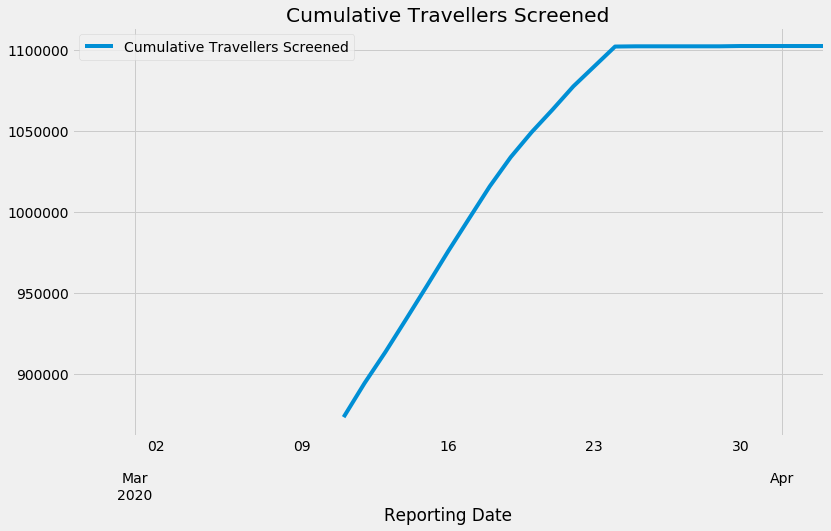

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Cumulative Travellers Screened']].plot(x='Reporting Date',kind='line',ax=ax, title="Cumulative Travellers Screened")

### As shown above, there has been travel restrictions

### Returnees from Iran and China

Returnees from Iran and China are not rising, so this curve is now flat indicating we are entering into safe zone as far as foreign infections are concerned.

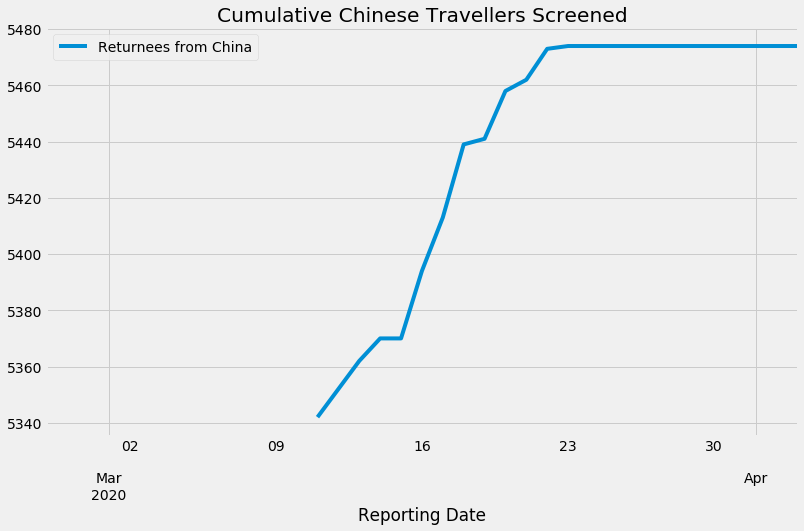

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Returnees from China']].plot(x='Reporting Date',kind='line',ax=ax, title="Cumulative Chinese Travellers Screened")

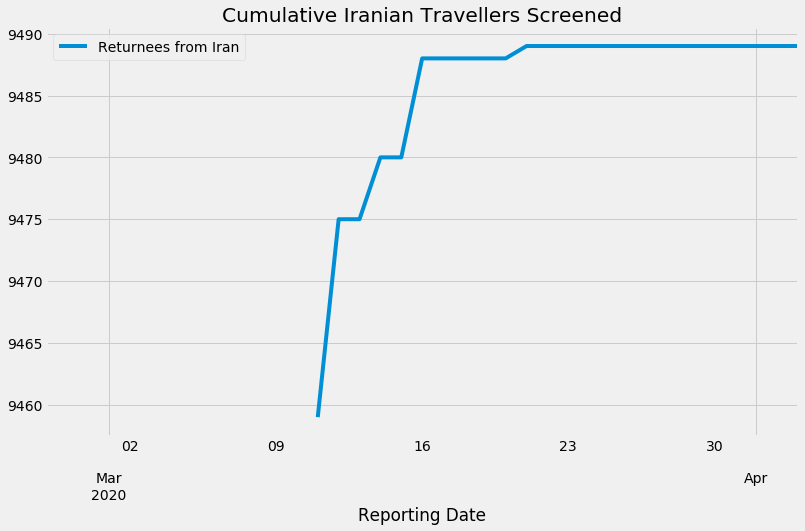

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Returnees from Iran']].plot(x='Reporting Date',kind='line',ax=ax, title="Cumulative Iranian Travellers Screened")

## Corona Virus Testing

Cheap and large scale testing against Corna Virus is important for quickly isolating patients and stopping spread of the disease. This has been successfully demonstrated by South Korea. In case of Pakistan, testing capacity has been very limited so it is possible that there lots of undetected cases and hence infection rates will increase. Pakistan's low number of positive cases can be largely attributed to poor testing capability and capacity. 

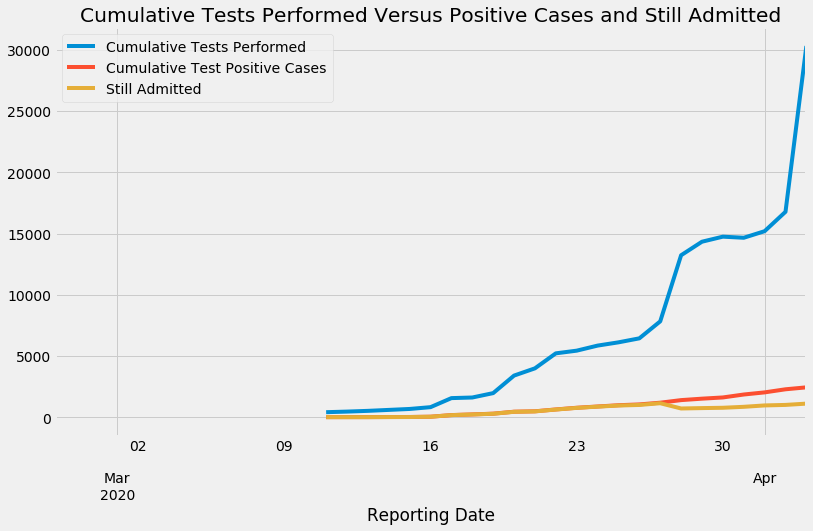

In [13]:
import matplotlib.pyplot as plt

ax.set_xlabel("Reporting Date")
ax.set_ylabel("Count of Confirmed Positive Cases, Tests Performed, and Admitted")
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Cumulative Tests Performed','Cumulative Test Positive Cases','Still Admitted']].plot(x='Reporting Date',kind='line', ax=ax, title="Cumulative Tests Performed Versus Positive Cases and Still Admitted")

### There is substantial increase in testing without corresponding increase in positive cases or deaths !

### More and more testing is being done as seen in graph. But still very limited testing being done can hide true number of local infections in Pakistan, and is a major concern at present. Good thing is with increase in testing, positive cases are not increasing at the same rate.

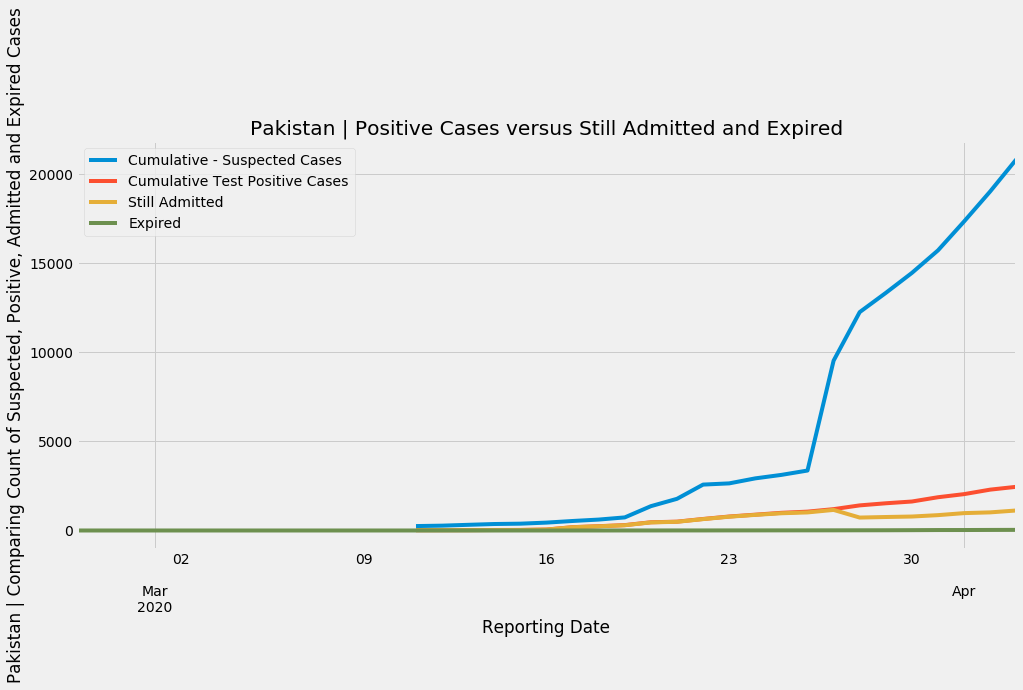

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Pakistan | Comparing Count of Suspected, Positive, Admitted and Expired Cases")
df[['Reporting Date','Cumulative - Suspected Cases','Cumulative Test Positive Cases','Still Admitted','Expired']].plot(x='Reporting Date',kind='line',ax=ax, title="Pakistan | Positive Cases versus Still Admitted and Expired")

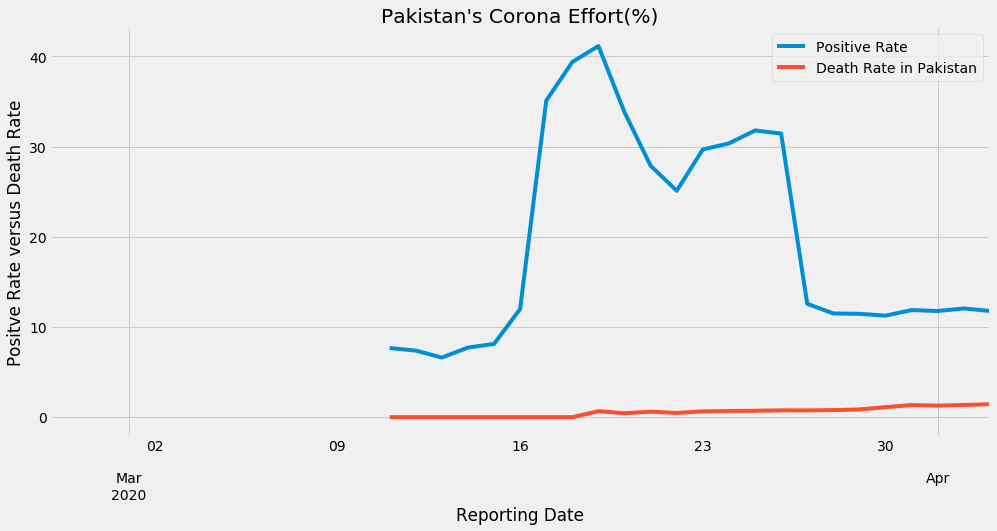

In [15]:
df['Positive Rate'] = (df['Cumulative Test Positive Cases']/df['Cumulative - Suspected Cases'])*100
df['Death Rate in Pakistan'] = (df['Expired']/df['Cumulative Test Positive Cases'])*100
#df[['Positive Rate','Admission Rate','Death Rate']]
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Positve Rate versus Death Rate")
df[['Reporting Date','Positive Rate','Death Rate in Pakistan']].plot(x='Reporting Date',kind='line', ax=ax, title="Pakistan's Corona Effort(%)")

### Positive rate continues to be around 10%, this will hopefully fall down with increased testing in place.

From 15th March to 25th March, Pakistan detected huge number of foreign positive cases; but gradually the trend dived because flights were stopped around that period.

In [16]:

df['Death Rate in Italy']= (df['Total Deaths in Italy']/df['Total Cases in Italy'])*100



While it is expected that positive might increase, and we need to make sure that we have enough capacity to take care of critically ill patients. So far so good, we have kept the death rate as flat as possible.

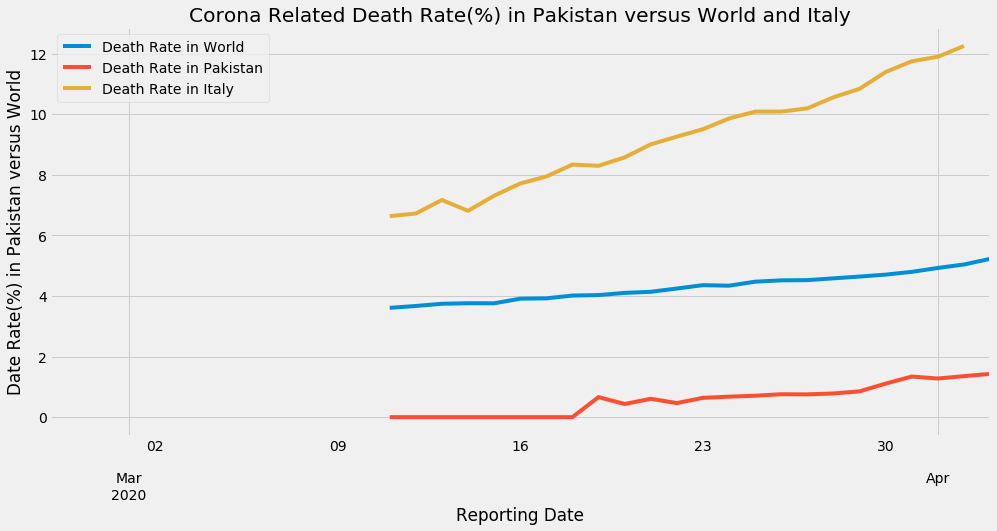

In [17]:
df['Death Rate in World']= (df['Global Deaths']/df['Global Cases'])*100
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Date Rate(%) in Pakistan versus World")
df[['Reporting Date','Death Rate in World','Death Rate in Pakistan','Death Rate in Italy']].plot(x='Reporting Date',kind='line',ax=ax, title="Corona Related Death Rate(%) in Pakistan versus World and Italy")
#df[['Reporting Date','Death Rate in Italy','Death Rate in Pakistan']].plot(x='Reporting Date',kind='line', ax=ax, title="Death Rate(%) in Pakistan versus Italy")

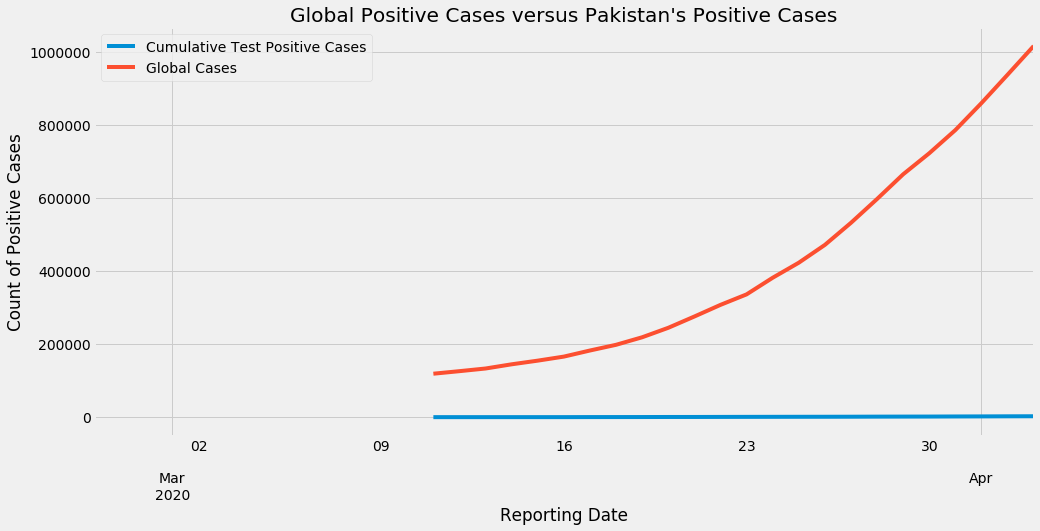

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Count of Positive Cases")
df[['Reporting Date','Cumulative Test Positive Cases','Global Cases']].plot(x='Reporting Date',kind='line',ax=ax, title="Global Positive Cases versus Pakistan's Positive Cases")

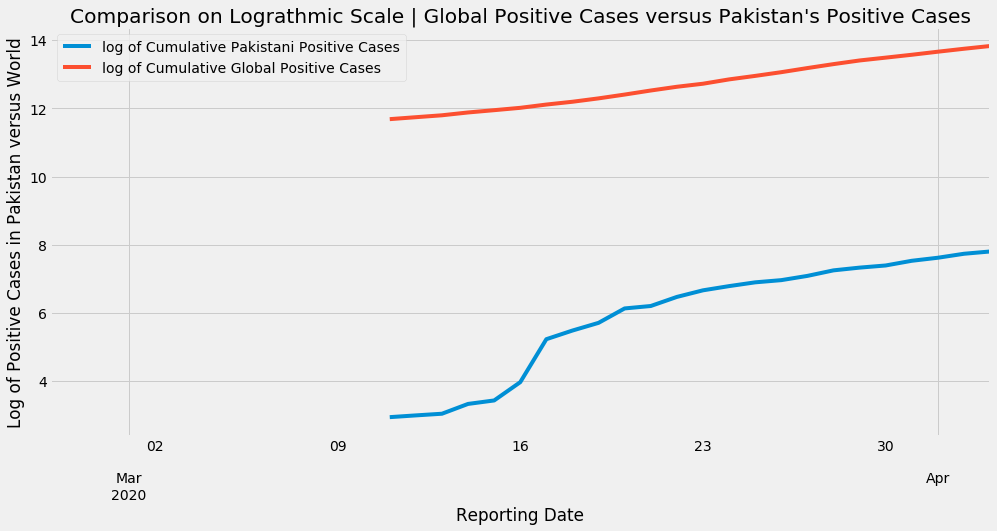

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Positive Cases in Pakistan versus World")

df['log of Cumulative Pakistani Positive Cases']= np.log(df['Cumulative Test Positive Cases'])
df['log of Cumulative Global Positive Cases']= np.log(df['Global Cases'])
df[['Reporting Date','log of Cumulative Pakistani Positive Cases','log of Cumulative Global Positive Cases']].plot(x='Reporting Date',kind='line',ax=ax, title="Comparison on Lograthmic Scale | Global Positive Cases versus Pakistan's Positive Cases")

Here lograthmic scale helps us with cases in two ways. First is, one or a few points are much larger than the bulk of the data. The second is to show percent change or multiplicative factors. Our rate of infections is still half as compared to world. However, we need to control it and bring it down to defeat Corona virus.

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


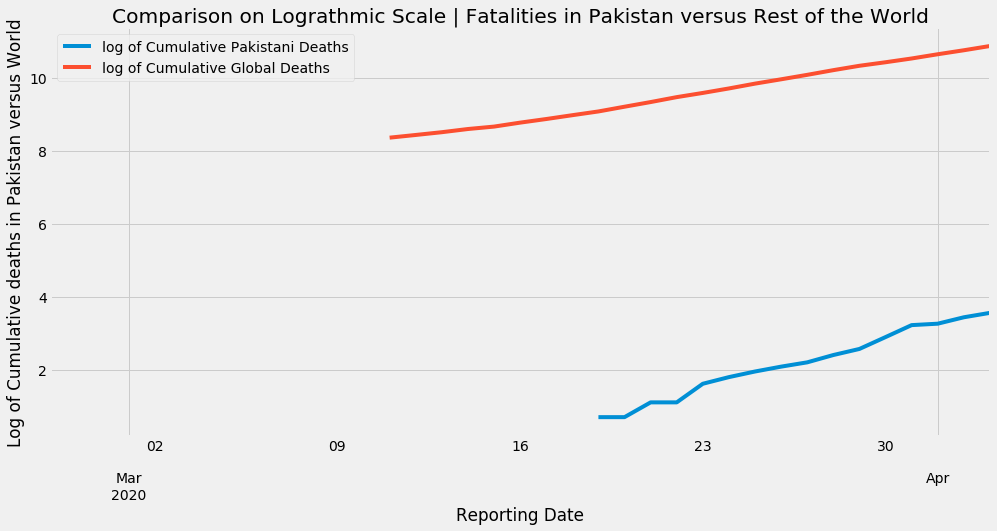

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Cumulative deaths in Pakistan versus World")

df['log of Cumulative Pakistani Deaths']= np.log(df['Expired'])
df['log of Cumulative Global Deaths']= np.log(df['Global Deaths'])
df[['Reporting Date','log of Cumulative Pakistani Deaths','log of Cumulative Global Deaths']].plot(x='Reporting Date',kind='line', ax=ax ,title="Comparison on Lograthmic Scale | Fatalities in Pakistan versus Rest of the World")

## Contact Tracing | Call Records


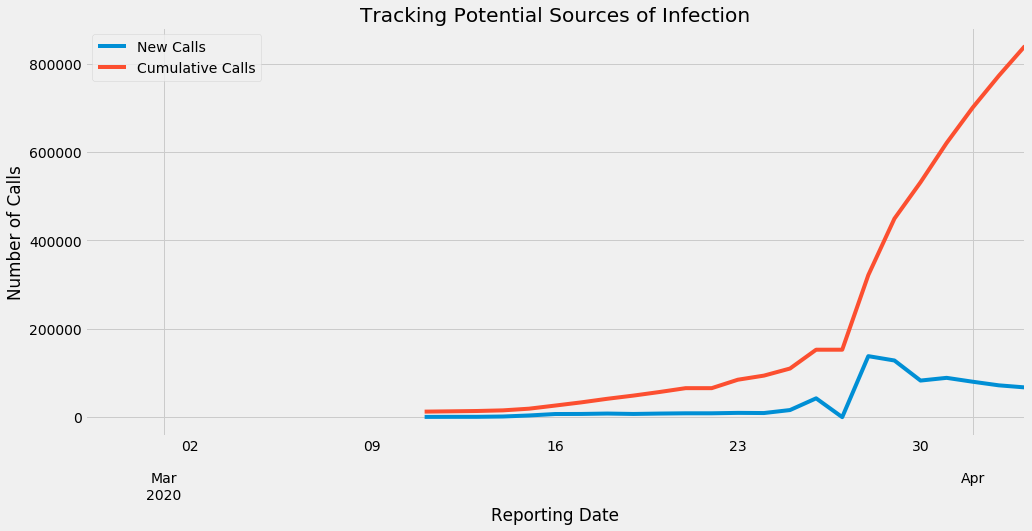

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Number of Calls")

df[['Reporting Date','New Calls','Cumulative Calls']].plot(x='Reporting Date',kind='line',ax=ax, title="Tracking Potential Sources of Infection")

### Aggressive contact tracing is in place, and would help a lot in combating spread of disease. Effectiveness of Contact tracing needs to be ensured to control Corona Virus in days ahead. 

## What is the Impact of Travelling Restrictions on Controlling Spread of Corona Virus ?

With travelling restrictions including flight ban taking effect on 21st March 2020, we might see number of foreign cases reducing with time. This may also reduce local cases. Major factor in local cases is of course social distance, restrictions on gatherings, weather etc.

### Reference

https://www.theguardian.com/world/2020/mar/21/pakistan-suspends-international-flights-for-two-weeks-to-stem-covid-19-spread


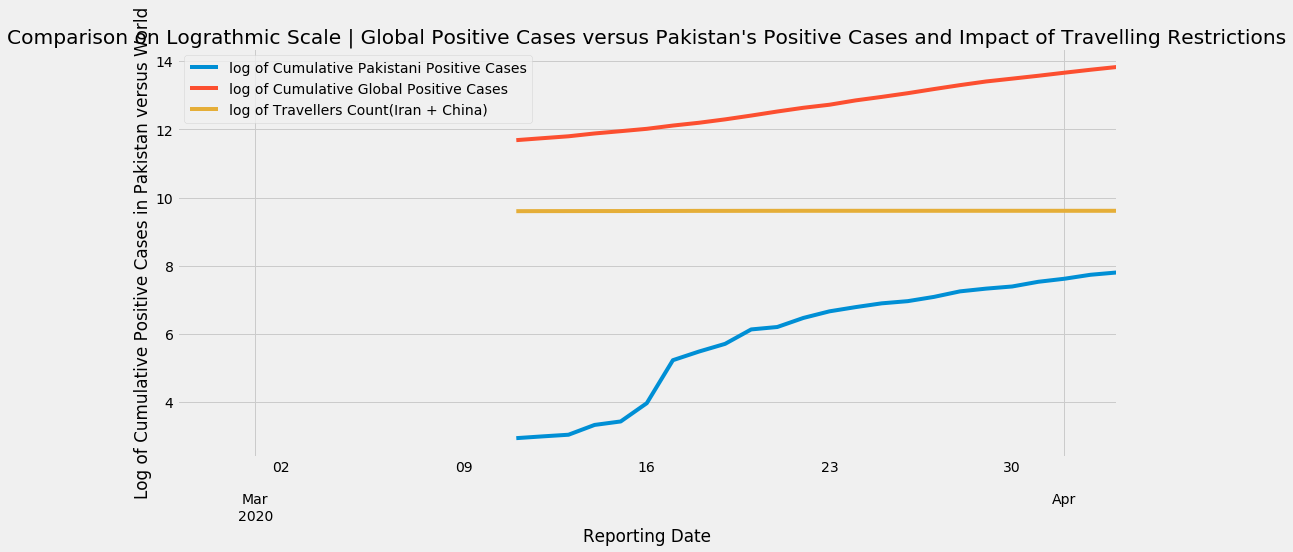

In [22]:

df['log of Travellers Count(Iran + China)']= np.log(df['Returnees from China'] + df['Returnees from Iran'] )

df['log of Cumulative Pakistani Positive Cases']= np.log(df['Cumulative Test Positive Cases'])

df['log of Cumulative Global Positive Cases']= np.log(df['Global Cases'])

fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Cumulative Positive Cases in Pakistan versus World")

df[['Reporting Date','log of Cumulative Pakistani Positive Cases','log of Cumulative Global Positive Cases','log of Travellers Count(Iran + China)']].plot(x='Reporting Date',kind='line',ax=ax, title="Comparison on Lograthmic Scale | Global Positive Cases versus Pakistan's Positive Cases and Impact of Travelling Restrictions")

## Why has Pakistan done better than Italy, Iran and China in prevention of corona virus Covid-19 ?

- Pakistan is culturally identical to Iran, Italy and China with large/close family units.
- Pakistanis are not very disciplined people, and just want to carry on with life regardless of government instructions and current challenges.
- Pakistan is much bigger than Iran and Italy
- Pakistan has high proportion of young population than Italy
- Pakistan is a poor country, with low quality housing, and health access to most of the population
- Italy is approximately 301,340 sq km, while Pakistan is approximately 796,095 sq km. Meanwhile, the population of Italy is ~62.1 million people (142.8 million more people live in Pakistan). We have positioned the outline of Italy near your home location of Lahore, PB, Pakistan.
- Pakistan is about 2 times smaller than Iran. Iran is approximately 1,648,195 sq km, while Pakistan is approximately 796,095 sq km. Meanwhile, the population of Iran is ~82.0 million people (122.9 million more people live in Pakistan). We have positioned the outline of Iran near your home location of Lahore, PB, Pakistan.
- Pakistan was much near to epicenter of Corona virus i.e. China. 
- Pakistan continued to receive thousands of visitors from Iran and China long after spread of Corona started.
- Given Pakistan's close relationship with Iran and China means that Pakistan's day 1 is same as China when building any model to predict spread of Corona virus.
- Pakistan continues to be high risk, and present status does not mean we can avoid bad situation in future due to failure of prevention/avoidance efforts !

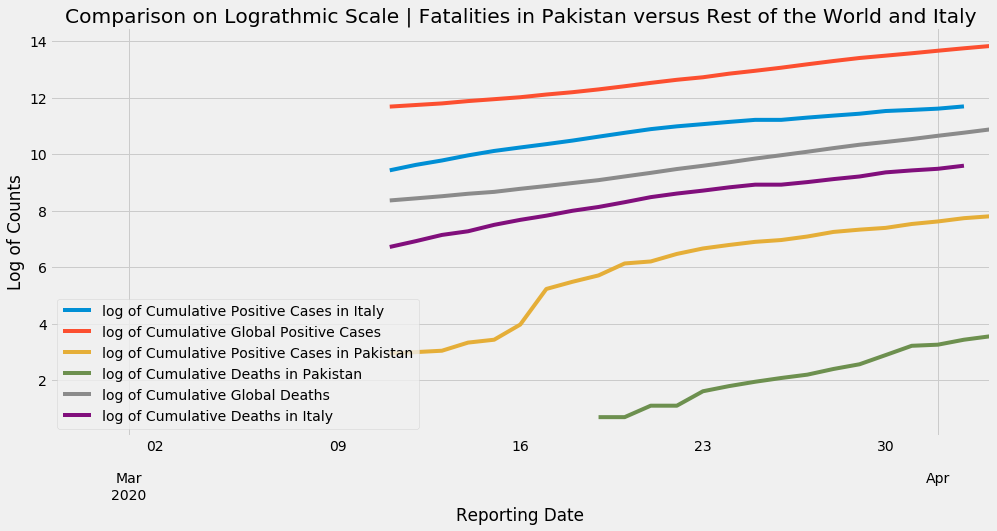

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Counts")

df['log of Cumulative Positive Cases in Pakistan']= np.log(df['Cumulative Test Positive Cases'])
df['log of Cumulative Global Positive Cases']= np.log(df['Global Cases'])
df['log of Cumulative Deaths in Pakistan']= np.log(df['Expired'])
df['log of Cumulative Global Deaths']= np.log(df['Global Deaths'])
df['log of Cumulative Positive Cases in Italy ']= np.log(df['Total Cases in Italy'])
df['log of Cumulative Deaths in Italy']= np.log(df['Total Deaths in Italy'])
df[['Reporting Date','log of Cumulative Positive Cases in Italy ','log of Cumulative Global Positive Cases','log of Cumulative Positive Cases in Pakistan','log of Cumulative Deaths in Pakistan','log of Cumulative Global Deaths','log of Cumulative Deaths in Italy']].plot(x='Reporting Date',kind='line',ax=ax, title="Comparison on Lograthmic Scale | Fatalities in Pakistan versus Rest of the World and Italy")

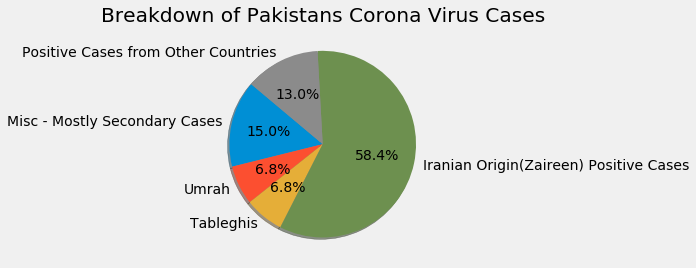

In [24]:
## As Per Media Reports quoting Zafar Mirza

import matplotlib.pyplot as plt
classes = ['Misc - Mostly Secondary Cases','Umrah','Tableghis', 'Iranian Origin(Zaireen) Positive Cases','Positive Cases from Other Countries']
pop = [220,100,100,857,191]

plt.pie(pop,labels=classes,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Breakdown of Pakistans Corona Virus Cases')

#Show
plt.show()

## Analysis of Data and Policy Suggestions

## Facts

1). Most the cases i.e. over 71% have direct foreign connection.
2). 10% of those being tested due to symptoms are turning out to be Corona positive. 
3). Less than 1% of those who test positive are fatalities
4). There have been many cases of people escaping from quarantine
5). People don't understand quarantine, and self isolation at home


## Policy

1). Given the facts that most of the positive cases have foreign origin, we need to keep borders closed and country open. We are doing completely opposite.
2). We need to increase testing bandwidth and make it easily available across the country to make sure that we do not miss out on potential outbreak.
3). Since less than 1% of positive cases are fatalities, therefore spend most of the effort in testing and prevention.
4). 
## Strategy

1). Lockdown borders and not the whole country.  Avoid potentially dangerous spread through aggressive testing and quarantine.
2). Adapt the strategy, if the ground realities change. 
3). Use selective but effective lockdown at local levels e.g. village, mohallah when needed.


## Summary of Conclusions

1). With blockage of international flights, local travel restrictions and reduction in number of travellers from Iran/China risk from travellers should reduce gradually in coming days.

2). Limited testing being done can hide true number of local infections in Pakistan, and is a major concern at present. However, right now with increase in testing we are not seeing large increase in positive cases. 

3). Aggressive contact tracing is in place, and would help a lot in combating spread of disease.

4). Pakistan is now at stage 2, and there is local spread which needs to be controlled through aggressive measures.

5). Number of deaths, mortality is very small in Pakistan as compared to rest of the world.

## References

- https://www.nih.org.pk/novel-coranavirus-2019-ncov/
- http://covid.gov.pk/


## Please Upvote, Share and Make a Contribution to Help us Fight Corona virus if Possible. Thanks for Appreciation.